<a href="https://colab.research.google.com/github/kangnurrohman/belajar-neural-network/blob/main/materi/Part%203%20-%20PyTorch%20Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install luwiji

In [2]:
from luwiji.neural_network import illustration, demo

##Sampel data

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.random.rand(500, 4)
y = np.random.rand(500, 3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 4), (100, 4), (400, 3), (100, 3))

##Step 1: Dataset & Dataloader

In [4]:
import torch
from torch.utils.data import DataLoader, TensorDataset

In [5]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [6]:
train_set = TensorDataset(X_train, y_train)
trainloader = DataLoader(train_set, batch_size=32, shuffle=True)

test_set = TensorDataset(X_test, y_test)
testloader = DataLoader(test_set, batch_size=32)

In [7]:
iterator = iter(trainloader)


In [8]:
iterator.next()

[tensor([[0.5338, 0.6693, 0.7465, 0.2412],
         [0.1895, 0.5144, 0.5174, 0.1754],
         [0.5025, 0.4073, 0.5271, 0.3256],
         [0.0010, 0.0690, 0.0776, 0.3829],
         [0.0455, 0.6527, 0.7445, 0.2653],
         [0.7170, 0.1677, 0.6316, 0.2902],
         [0.8536, 0.4614, 0.6128, 0.2480],
         [0.8258, 0.6408, 0.7622, 0.2683],
         [0.7620, 0.9930, 0.9730, 0.9195],
         [0.2232, 0.2897, 0.6079, 0.5246],
         [0.0106, 0.0966, 0.2634, 0.8186],
         [0.2365, 0.1965, 0.4538, 0.4884],
         [0.7753, 0.3539, 0.0237, 0.5081],
         [0.0821, 0.7708, 0.4843, 0.8337],
         [0.5834, 0.6621, 0.2982, 0.5598],
         [0.7900, 0.5478, 0.6579, 0.9489],
         [0.9847, 0.3045, 0.6129, 0.7209],
         [0.7779, 0.5666, 0.6431, 0.3012],
         [0.2533, 0.4994, 0.4689, 0.0853],
         [0.5289, 0.2080, 0.4849, 0.3992],
         [0.2346, 0.3954, 0.7659, 0.6507],
         [0.2307, 0.4415, 0.7107, 0.2383],
         [0.6051, 0.7405, 0.0825, 0.8019],
         [0

##Step 2: Bangun Arsitektur 

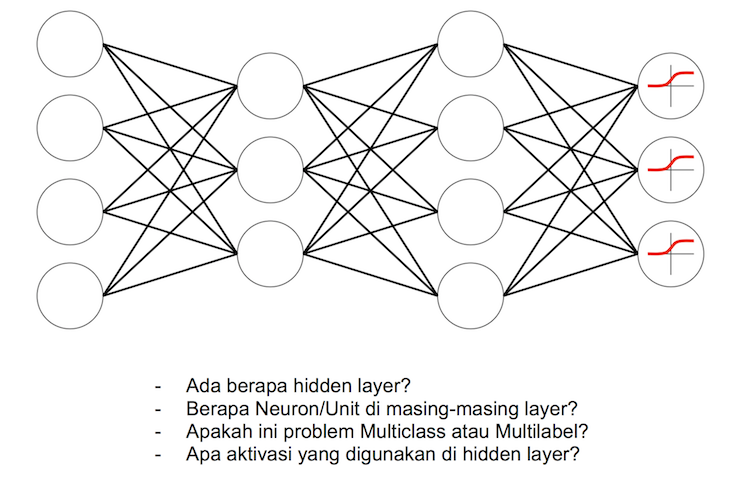

In [9]:
illustration.quiz

In [10]:
from torch import nn

In [11]:
nn.Sequential(
    nn.Linear(4,3),
    nn.ReLU(),
    nn.Linear(3,4),
    nn.ReLU(),
    nn.Linear(4,3),
    nn.Sigmoid()
)

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
  (5): Sigmoid()
)

## Step 3: Training Preparation -> MCO

###Model

In [12]:
model = nn.Sequential(
    nn.Linear(4,3),
    nn.ReLU(),
    nn.Linear(3,4),
    nn.ReLU(),
    nn.Linear(4,3),
    nn.Sigmoid()
)

###Criterion

In [13]:
criterion = nn.MSELoss() # model diakhiri linear / untuk regresi
criterion = nn.NLLLoss() # model diakhiri Logsoftmax / multiclass clf
criterion = nn.BCELoss() # model diakhiri sigmoid / binary cls multilabel clf

###Optimizer

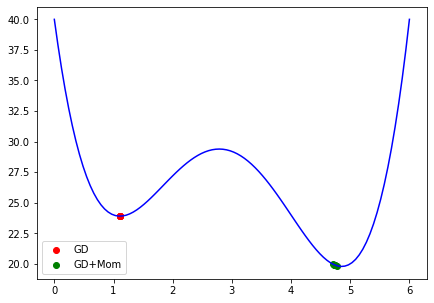

In [14]:
demo.momentum()

In [15]:
from torch import optim

In [16]:
optimizer = optim.AdamW(model.parameters(), lr = 0.001)

##Step 4: Training Loop

In [21]:
epochs = 500
train_cost = []
for i in range(epochs):
  model.train()
  cost = 0
  for feature, target in trainloader:
    output = model(feature) #feedforward
    loss = criterion(output, target)
    loss.backward() #backprop

    optimizer.step() #update weight
    optimizer.zero_grad()

    cost += loss.item() * feature.shape[0]
  train_cost.append(cost / len(train_set))

  print(f"\rEpochs: {i+1:4}/{epochs:4} | train_cost: {train_cost[-1]:.4f}", end="")

Epochs:  500/ 500 | train_cost: 0.6910

In [18]:
import matplotlib.pyplot as plt

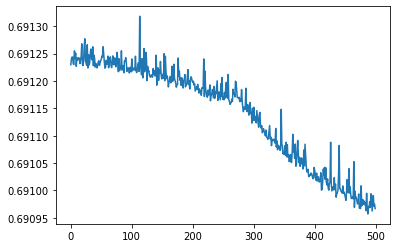

In [22]:
plt.plot(train_cost)